# TUGAS 2 : Menghitung Jarak

NAMA : MOHAMMAD IQBAL SURYA RAMADHAN

NIM  : 210411100002

Mata Kuliah Penambangan Data - C

**Penjelasan Tipe Data :**

*   Kolom "Umur" adalah tipe data numerik karena nilainya berupa angka.
*   Kolom "Jenis Kelamin" dan "Status Pernikahan" adalah tipe data kategorical/nominal karena nilainya terdiri dari kategori atau label.
*  Kolom "Status Pernikahan" adalah tipe data biner asimetris karena nilainya hanya bisa berupa Married atau Single.
*  Kolom "Umur" dan "Tingkat Pendidikan" adalah tipe data ordinal karena nilainya dapat diurutkan secara teratur.




In [ ]:
import pandas as pd
import numpy as np
genderic = pd.read_csv('https://raw.githubusercontent.com/Iqbalsuryaa/pendata/main/gender-oke.csv')
genderic

,gender,age,height (cm),weight (kg),occupation,educationlevel,maritalstatus,income (USD),favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Master's Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Master's Degree,Single,35000,Yellow
...,...,...,...,...,...,...,...,...,...
126,female,32,170,64,Nurse,Bachelor's Degree,Single,60000,Orange
127,male,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black
128,female,27,162,55,Graphic Designer,Bachelor's Degree,Single,55000,Green
129,male,33,175,77,Sales Representative,Bachelor's Degree,Married,80000,Yellow


In [ ]:
# Show all columns from dataframe
genderic.columns

Index(['gender', 'age', 'height (cm)', 'weight (kg)', 'occupation',
       'educationlevel', 'maritalstatus', 'income (USD)', 'favorite Color'],
      dtype='object')

Seleksi Fitur 



*   Item gender
*   Item maritalstatus



In [ ]:
genderic[['gender','maritalstatus']].head(5)

,gender,maritalstatus
0,male,Married
1,male,Single
2,female,Married
3,male,Single
4,female,Single


Change Values to 1/0 Take all values of ‘gender’

If values is Female change to 1

If values is Male to 0

In [ ]:
# gender code
Gen_wanita = "female"
Gen_pria = "male"

# binary value
value_one = 1
value_zero = 0

def change_gender_to_binary(gender):
    return value_one if gender == Gen_pria else value_zero

Change Values to 1/0 Take all values of ‘maritalstatus	’

If values is sdh_menikah change to 1

If values is msh_sendiri to 0

In [ ]:
# statuspernikahan
sdh_menikah = "Married"
msh_sendiri = "Single"

# binary value
value_one = 1
value_zero = 0

def change_maritalstatus_to_binary(maritalstatus):
    return value_one if maritalstatus == msh_sendiri else value_zero

In [ ]:
# Update all values
genderic["gender"] = genderic["gender"].apply(change_gender_to_binary)
genderic["maritalstatus"] = genderic["maritalstatus"].apply(change_maritalstatus_to_binary)

In [ ]:
genderic[['gender', 'maritalstatus']].head(10)

,gender,maritalstatus
0,1,0
1,1,1
2,0,0
3,1,1
4,0,1
5,1,1
6,0,1
7,1,0
8,0,0
9,1,0


In [ ]:
# CONSTAN VARIABLE
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

PROBALITY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [ ]:
def get_series(gender, idx, series):
    return gender.loc[(idx), series]

In [ ]:
def dissimilarity_dataset(gender, series_index = [], series = []):
    first_series = get_series(gender, series_index[0], series)
    second_series = get_series(gender, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [ ]:
dissimilarity_dataset(genderic, [1,2], ["gender", "maritalstatus"]).T

,1,2
gender,1,0
maritalstatus,1,0


In [ ]:
genderic.loc[0:4, ["gender", "maritalstatus"]]

,gender,maritalstatus
0,1,0
1,1,1
2,0,0
3,1,1
4,0,1


In [ ]:
def count_probality_value(gender, start_index = 0, last_index = 1):

    PROBALITY_VALUE = {"q" : 0, "r" : 0, "s" : 0, "t" : 0}

    column_range = gender.shape[1]

    for column in range(column_range):
        for value in PROBALITY_TABLE_VALUE:
            item = list((tuple(gender.loc[(start_index):(last_index), gender.columns[column]]) == PROBALITY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    PROBALITY_VALUE["q"] += 1
                if item[1] == "r":
                    PROBALITY_VALUE["r"] += 1
                if item[1] == "s":
                    PROBALITY_VALUE["s"] += 1
                if item[1] == "t":
                    PROBALITY_VALUE["t"] += 1

    return PROBALITY_VALUE

In [ ]:
# dimensi (1,2)
dimensi_1_2 = dissimilarity_dataset(genderic, [1,2], ["gender", "maritalstatus"])

In [ ]:
probality_d_1_2 = count_probality_value(dimensi_1_2, 1, 2)

In [ ]:
# dimensi (1,3)
dimensi_1_3 = dissimilarity_dataset(genderic, [1,3], ["gender", "maritalstatus"])

In [ ]:
probality_d_1_3 = count_probality_value(dimensi_1_3, 1, 3)

In [ ]:
# dimensi (1,4)
dimensi_1_4 = dissimilarity_dataset(genderic, [1,4], ["gender", "maritalstatus"])

In [ ]:
probality_d_1_4 = count_probality_value(dimensi_1_4, 1, 4)

Dissimilarity Binary Symetric Value Formula

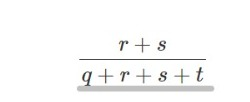

In [ ]:
def dissimilarity_binary_symetric_distance(probality_value):
  
    return (probality_value["r"] + probality_value["s"]) / (probality_value["q"] + probality_value["r"] + probality_value["s"] + probality_value["t"])

In [ ]:
dimensi_1_2 = dissimilarity_binary_symetric_distance(probality_d_1_2)
dimensi_1_3 = dissimilarity_binary_symetric_distance(probality_d_1_3)
dimensi_1_4 = dissimilarity_binary_symetric_distance(probality_d_1_4)

In [ ]:
#d1 dan d2

dimensi_1_2

1.0

In [ ]:
# d1 dan d4

dimensi_1_3

0.0

In [ ]:
# d1 dan d4

dimensi_1_4

0.5